Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_AUE
Info in <TCanvas::Print>: png file S12_rad_mean.png has been created
Info in <TCanvas::Print>: png file S18_rad_mean.png has been created
Info in <TCanvas::Print>: png file S12_rad_sd.png has been created
Info in <TCanvas::Print>: png file S18_rad_sd.png has been created
Info in <TCanvas::Print>: png file S12_ver_mean.png has been created
Info in <TCanvas::Print>: png file S18_ver_mean.png has been created
Info in <TCanvas::Print>: png file S12_ver_sd.png has been created
Info in <TCanvas::Print>: png file S18_ver_sd.png has been created


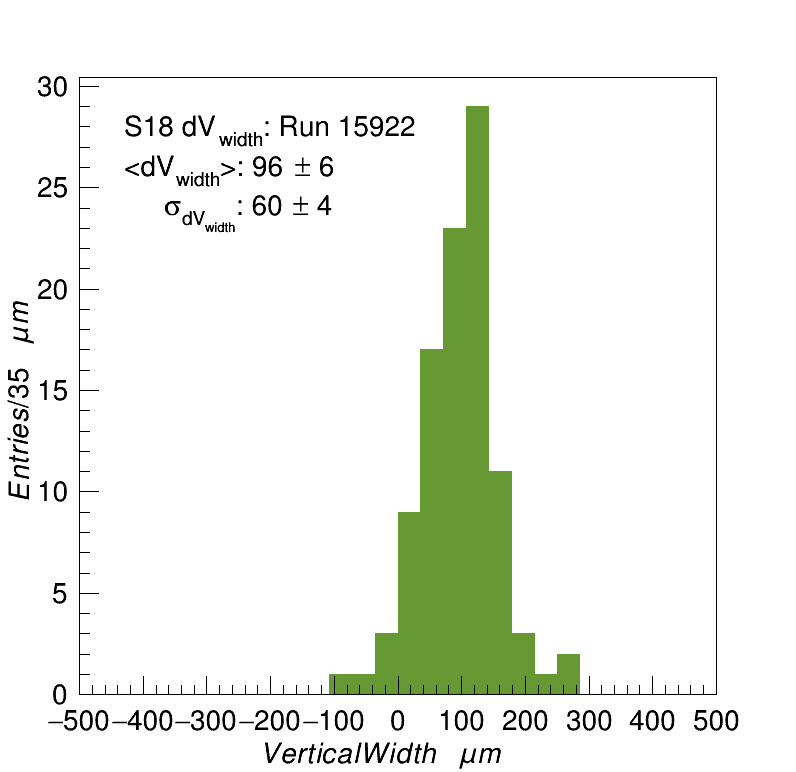

In [60]:
# Jupyter ROOT import 
import sys, os
sys.path.append("/usr/local/Cellar/root/6.16.00_3/lib/root")
# ROOT includes 
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1, TPaveStats, gPad, gROOT, TH1, TH1F, TLegend

scr_nominal = "AUE.root"

plotNames = ["S12_rad_mean", "S18_rad_mean", "S12_rad_sd", "S18_rad_sd", "S12_ver_mean", "S18_ver_mean", "S12_ver_sd", "S18_ver_sd"] 
plotXTtitles = ["Radial Mean", "Radial Mean", "Radial Width", "Radial Width", "Vertical Mean", "Vertical Mean", "Vertical Width", "Vertical Width"] 
plotTitles = ["S12 dR", "S18 dR", "S12 dR_{width}", "S18 dR_{width}", "S12 dV", "S18 dV", "S12 dV_{width}", "S18 dV_{width}"]
meanName = ["<dR>", "<dR>", "<dR_{width}>", "<dR_{width}>", "<dV>", "<dV>", "<dV_{width}>", "<dV_{width}>"]
sdName = ["#sigma_{dR}", "#sigma_{dR}", "#sigma_{dR_{width}}", "#sigma_{dR_{width}}",  "#sigma_{dV}", "#sigma_{dV}", "#sigma_{dV_{width}}", "#sigma_{dV_{width}}"]

#Legen labels (looped over i_state)
legendName = ["Iteration1"]
colorLine = [3] #  green
colorHisto = [3] # green


#Open TFiles (looped over i_state)
scrFile_nominal = TFile.Open(scr_nominal)
fileName = [scrFile_nominal] # nominal (0) 

#Global empty containers to be filled for vertical or radial (in the main loop)
result = "-1"
mean = -1
mean_error = -1 
sd = -1 
sd_error = -1 

###### Plotting ##########
histos=[]
legends=[]
canvas_AUE = TCanvas("canvas_AUE", " ", 600, 1200)
canvas_AUE.Divide(1)
legend_aue =  TLegend(0.15, 0.7, 0.4, 0.85)

for i_plot in range(0, len(plotNames)):

    #Make new canvas for plots (4 in total)
    canvas = TCanvas(str(plotNames[i_plot]), " ", 800, 800)
    
    #Postion legend once per main loop accordingly 
    legend =  TLegend(0.15, 0.7, 0.4, 0.85)
    legends.append(legend)
    
    #Get the TH1F 
    hist_1D = fileName[0].Get(plotNames[i_plot])
    #print(hist_1D.GetName())
    histos.append(hist_1D)
    hist_1D.SetTitle("")
    hist_1D.GetXaxis().SetLabelOffset(0.015)
    hist_1D.GetYaxis().SetLabelOffset(0.015)
    hist_1D.GetXaxis().SetTitleOffset(1.2)
    binN=hist_1D.GetBinWidth(1)
    hist_1D.GetYaxis().SetTitle("Entries / "+str(int(binN))+r"$\mu m$")
    hist_1D.GetXaxis().SetTitle(plotXTtitles[i_plot]+"$\mu m$")
    hist_1D.GetYaxis().CenterTitle()
    hist_1D.GetXaxis().CenterTitle()
    hist_1D.GetYaxis().SetTitleOffset(1.2);
    hist_1D.GetYaxis().SetTitleSize(0.039)
    hist_1D.GetYaxis().SetLabelSize(0.039)
    hist_1D.GetXaxis().SetTitleSize(0.039)
    hist_1D.GetXaxis().SetLabelSize(0.039)
    hist_1D.Draw()
    
    #Plotting 
    hist_1D.SetFillColor(823)
    hist_1D.SetLineColor(823)
    gStyle.SetLegendBorderSize(0)
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(0)
    gStyle.SetFillStyle(1001)
    gROOT.ForceStyle()
    
    #if(plotNames[i_plot]=="S12_rad_sd" or plotNames[i_plot]=="S18_rad_sd"):
    #    hist_1D.GetXaxis().SetRangeUser(-800, 800)
        

    mean = int(round(hist_1D.GetMean(), 0))
    mean_error = int(round(hist_1D.GetMeanError(), 0))
    sd = int(round(hist_1D.GetRMS(), 0))
    sd_error = int(round(hist_1D.GetRMSError(), 0))

    #take care of the legend
    legenValue1 = str(meanName[i_plot])+": "+str(mean)+" #pm "+str(mean_error) 
    legenValue2 = str(sdName[i_plot])+": "+str(sd)+" #pm "+str(sd_error)
    legend.Draw()
        
    #Do some final massagin and save to a file
    legend.SetHeader("#splitline{"+str(plotTitles[i_plot])+": Run 15922}{#splitline{"+str(legenValue1)+"}{    "+str(legenValue2)+"}}"); # option "C" allows to center the header
    legend.SetTextSize(.040)
    canvas.Draw()
    canvas.Print(str(plotNames[i_plot])+".png")
    
    #Now draw on total canvas 
    #canvas_AUE.cd(int(i_plot+1))
    hist_1D.Draw()
    legends[i_plot].Draw()
     
    
#     canvas_AUE.Draw()
#     canvas_AUE.Print(plotNames[i_plot])